In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [6]:
df = pd.read_csv("data/dataset_schema_v1.csv")

print(df.shape)
df.head()


(400, 8)


,url_length,dot_count,hyphen_count,has_https,has_ip,suspicious_keyword_count,entropy,label
0,104,2,0,1,0,0,5.11,1
1,35,2,1,0,0,0,4.07,1
2,82,3,8,0,0,0,4.46,1
3,18,1,0,1,0,0,3.61,0
4,18,1,0,1,0,0,3.73,0


In [7]:
X = df.drop("label", axis=1)
y = df["label"]

print("Feature shape:", X.shape)
print("Label shape:", y.shape)


Feature shape: (400, 7)
Label shape: (400,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (320, 7)
X_test: (80, 7)
y_train: (320,)
y_test: (80,)


In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


In [10]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9875
Precision: 1.0
Recall: 0.9782608695652174


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        46

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



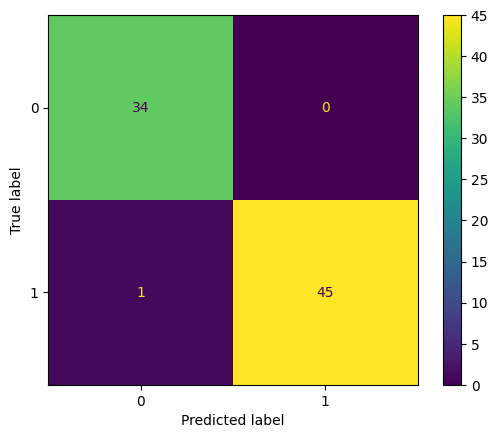

In [12]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [13]:
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")


url_length: 0.39543248183131624
dot_count: 0.17864365807162016
hyphen_count: 0.5451689277751858
has_https: -3.175654066767321
has_ip: 0.07981931390077988
suspicious_keyword_count: 0.437670098035714
entropy: -0.8408195233777364


In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Average CV accuracy:", scores.mean())


Cross-validation scores: [0.9625 0.9375 0.975  0.9625 0.975 ]
Average CV accuracy: 0.9625
